In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftfreq
import sympy as smp

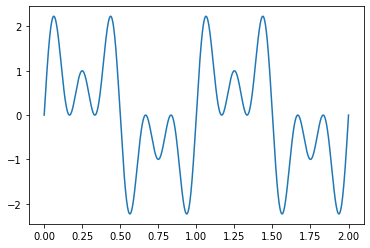

In [10]:
# fft in one dimension
sr = 2000
si = 1/sr

t = np.linspace(0,2,sr)

freq = 1
x = np.sin(2*np.pi*freq*t)
freq = 3
x += np.sin(2*np.pi*freq*t)
freq = 5
x += np.sin(2*np.pi*freq*t)
plt.plot(t,x)

<StemContainer object of 3 artists>

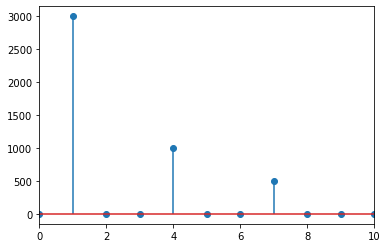

In [15]:
xft = np.fft.fft(x)
freq = fftfreq(len(x), 1/2000)
plt.xlim(0,10)
plt.stem(freq,np.abs(xft))

In [17]:
# analytically solving fourier transform using symbolic calculation in sympy
t,f = smp.symbols('t,f',real=True)
k = smp.symbols('k', real=True, positive=True)
x = smp.exp(-k*t**2)*k*t
print(x)
from sympy.integrals.transforms import fourier_transform
xft = fourier_transform(x,t,f)
print(xft)

k*t*exp(-k*t**2)
-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)


In [ ]:
# numerical integration to do F.T. integral
from scipy.integrate import quad
#t,f = smp.symbols('t,f',real=True)

def func(t,k):
    return np.exp(-k*t**2)*np.sin(k*t)*t**4
def getft(x,f,k):
    xft_integrand_real = lambda t: np.real(x(t,k)*np.exp(-2*np.pi*1j*f*t))
    xft_integrand_comp = lambda t: np.imag(x(t,k)*np.exp(-2*np.pi*1j*f*t))
    xft_real = quad(xft_integrand_real, -np.inf, np.inf)[0]
    xft_comp = quad(xft_integrand_comp, -np.inf, np.inf)[0]
    return xft_real + 1j*xft_comp
f = np.linspace(-4,4,100)
x_ft = np.vectorize(getft)(func,f,k=2)
plt.plot(f,np.abs(x_ft))
plt.grid()

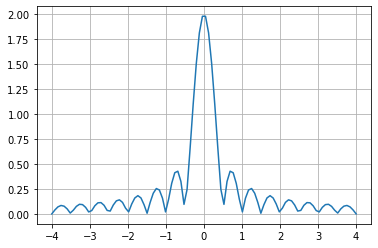

In [46]:
# single slit diffraction pattern using above method
from scipy.integrate import quad
#t,f = smp.symbols('t,f',real=True)

def func(t):
    return np.heaviside(t+1,1) - np.heaviside(t-1,1)
def getft(x,f):
    xft_integrand_real = lambda t: np.real(x(t)*np.exp(-2*np.pi*1j*f*t))
    xft_integrand_comp = lambda t: np.imag(x(t)*np.exp(-2*np.pi*1j*f*t))
    xft_real = quad(xft_integrand_real, -np.inf, np.inf)[0]
    xft_comp = quad(xft_integrand_comp, -np.inf, np.inf)[0]
    return xft_real + 1j*xft_comp
f = np.linspace(-4,4,100)
x_ft = np.vectorize(getft)(func,f)
plt.plot(f,np.abs(x_ft))
plt.grid()

In [47]:
# circular slit diffraction pattern using above method
from scipy.integrate import dblquad

e,n,fx,fy = smp.symbols('e,n,fx,fy',real=True)

def func(e,n):
    return np.heaviside(2-np.sqrt(e**2 + n**2),1)

def getft(u,fx,fy):
    uft_integrand_real = lambda e,n: np.real(u(e,n)*np.exp(-2*np.pi*1j*(fx*e+fy*n)))
    uft_integrand_imag = lambda e,n: np.imag(u(e,n)*np.exp(-2*np.pi*1j*(fx*e+fy*n)))
    uft_real = dblquad(uft_integrand_real,-np.inf,np.inf,-np.inf,np.inf)[0]
    uft_imag = dblquad(uft_integrand_imag, -np.inf,np.inf,-np.inf,np.inf)[0]
    return uft_real + 1j*uft_imag
f = np.linspace(-4,4,20)
fx,fy = np.meshgrid(f,f)
FT = np.vectorize(getft)(func,fx,fy)
ax = plt.axes(projection = '3d')
ax.scatter3D(fx,fy,np.abs(FT))

/home/kanan/.local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:881: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/home/kanan/.local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:881: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  **opt)


KeyboardInterrupt: 